In [ ]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np 
import joblib,glob,os,cv2
from scipy.ndimage import filters
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = []
labels = []
human_im_path = '/content/drive/My Drive/Dataset/DATAIMAGE/human/'
nonhuman_im_path = '/content/drive/My Drive/Dataset/DATAIMAGE/nonhuman/'


In [ ]:
# Load the positive features
for filename in glob.glob(os.path.join(human_im_path,"*.png")):
    im = cv2.imread(filename,0)
    im = cv2.resize(im,(64,128))
#creating hog features
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=False)

    data.append(fd)
    labels.append(1)


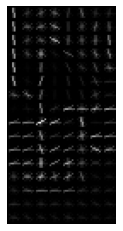

In [ ]:
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [ ]:
hog_image.shape

(128, 64)

In [ ]:
fd.shape

(3780,)

In [ ]:
len(data)

2426

In [ ]:
# Load the positive features
for filename in glob.glob(os.path.join(nonhuman_im_path,"*.jpg")):
    im = cv2.imread(filename,0)
    im = cv2.resize(im,(64,128))
#creating hog features
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=False)

    data.append(fd)
    labels.append(0)


In [ ]:
len(data)

5660

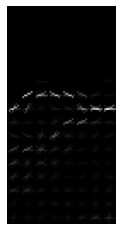

In [ ]:
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=0)
print("Labels for training and testing data")
print(len(train_data))
print(len(test_data))

Labels for training and testing data
3961
1698


In [ ]:
print(len(train_labels))
print(len(test_labels))

3961
1698


In [ ]:
model = SVC(C= 1, kernel='linear')

In [ ]:
model.fit(train_data, train_labels)

SVC(C=1, kernel='linear')

In [ ]:
labels = np.unique(train_labels)
print(labels) 

[0 1]


In [ ]:
predictions = model.predict(test_data)
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
percentage = model.score(test_data, test_labels)

In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(test_labels, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(test_data)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[911  61]
 [ 67 659]]
Test Set: 1698
Accuracy = 92.46171967020024 %
